In [1]:
from warnings import filterwarnings

filterwarnings('ignore')

In [2]:
from copy import deepcopy
import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [5]:
pp = pprint.PrettyPrinter(indent = 4)

In [6]:
df = pd.read_pickle('../Pickles/df.pkl')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8862 entries, 0 to 9087
Data columns (total 54 columns):
cow_code                          8862 non-null int64
state_name                        8862 non-null object
year                              8862 non-null int64
num_trade_states                  8862 non-null float64
export_dollars                    8583 non-null float64
import_dollars                    8570 non-null float64
t_num_conflicts                   8862 non-null float64
military_expenditure              8330 non-null float64
military_personnel                8729 non-null float64
prim_energy_consumption           8815 non-null float64
total_pop                         8862 non-null float64
cinc_score                        8862 non-null float64
num_alliances                     8862 non-null float64
pre_1816_alliances                8862 non-null float64
num_in_effect_1231_2012           8862 non-null float64
defense_treaties                  8862 non-null float64
ne

In [8]:
# impute for total non-religious
# do any other religion values not make sense as 0?
# use threshold for first non-zero
# maybe a relevant 0 is any 0 followed by a number greater than 10,000?

In [9]:
df = df.sort_values(by = ['year', 'cow_code'], ascending = True)

In [10]:
len(df.columns)

54

In [11]:
df.columns

Index(['cow_code', 'state_name', 'year', 'num_trade_states', 'export_dollars',
       'import_dollars', 't_num_conflicts', 'military_expenditure',
       'military_personnel', 'prim_energy_consumption', 'total_pop',
       'cinc_score', 'num_alliances', 'pre_1816_alliances',
       'num_in_effect_1231_2012', 'defense_treaties', 'neutrality_treaties',
       'nonaggression_treaties', 'entente_treaties', 'num_conflicts',
       'avg_cum_duration', 'num_wars', 'ongoing_2010', 'revision_pct',
       'avg_hostility_level', 'majority_religion', 'dominant_majority',
       'un_region', 'un_continent', 'election_type', 'legislation_type',
       'legislature_status', 'party_legal_status', 'party_existance',
       'party_existance_outside_regime', 'legislature_parties',
       'incumbent_type', 'collective_leadership', 'num_leadership_changes',
       'leader_tenure', 'military_leader', 'royal_leader',
       'nominal_vs_eff_diff', 'communist_leader', 'leader_died',
       'democratic_regime',

In [12]:
for year in df['year'].unique():
    if df[df['year'] == year]['cow_code'].value_counts().values[0] > 1:
        print(year)

2007
2008


In [13]:
df[df['year'] == 2009]['cow_code'].value_counts()[:10]

Series([], Name: cow_code, dtype: int64)

In [14]:
df[(df['year'] == 2009) & (df['cow_code'] == 710)]

,cow_code,state_name,year,num_trade_states,export_dollars,import_dollars,t_num_conflicts,military_expenditure,military_personnel,prim_energy_consumption,total_pop,cinc_score,num_alliances,pre_1816_alliances,num_in_effect_1231_2012,defense_treaties,neutrality_treaties,nonaggression_treaties,entente_treaties,num_conflicts,avg_cum_duration,num_wars,ongoing_2010,revision_pct,avg_hostility_level,majority_religion,dominant_majority,un_region,un_continent,election_type,legislation_type,legislature_status,party_legal_status,party_existance,party_existance_outside_regime,legislature_parties,incumbent_type,collective_leadership,num_leadership_changes,leader_tenure,military_leader,royal_leader,nominal_vs_eff_diff,communist_leader,leader_died,democratic_regime,cabinet_assembly,popular_election,regime_type,transition_to_democracy,transition_to_dictatorship,age_govt,num_transitions_ever,mtco2


In [15]:
df.drop(8709, inplace = True)
df.drop(8877, inplace = True)
df.drop(8792, inplace = True)
df.drop(8735, inplace = True)
df.drop(9072, inplace = True)
df.drop(9063, inplace = True)
df.drop(8930, inplace = True)
df.drop(9036, inplace = True)

df = df.reset_index()
df.drop(['index'], axis = 1, inplace = True)

In [16]:
# df.drop(12703, inplace = True)
# df.drop(7994, inplace = True)
# df.drop(10844, inplace = True)
# df.drop(844, inplace = True)
# df.drop(7996, inplace = True)
# df.drop(12705, inplace = True)
# df.drop(846, inplace = True)
# df.drop(10846, inplace = True)
# df.drop(7998, inplace = True)
# df.drop(12707, inplace = True)
# df.drop(848, inplace = True)
# df.drop(10848, inplace = True)

# df = df.reset_index()
# df.drop(['index'], axis = 1, inplace = True)

In [17]:
# df.drop(8709, inplace = True)
# df.drop(8877, inplace = True)
# df.drop(8792, inplace = True)
# df.drop(8735, inplace = True)
# df.drop(9072, inplace = True)
# df.drop(9063, inplace = True)
# df.drop(8930, inplace = True)
# df.drop(9036, inplace = True)

# df.drop(3890, inplace = True)
# df.drop(6610, inplace = True)
# df.drop(6629, inplace = True)
# df.drop(6913, inplace = True)
# df.drop(7577, inplace = True)
# df.drop(8751, inplace = True)
# df.drop(8804, inplace = True)
# df.drop(8854, inplace = True)
# df.drop(8858, inplace = True)
# df.drop(9057, inplace = True)
# df.drop(9000, inplace = True)
# df.drop(8931, inplace = True)
# df.drop(8912, inplace = True)

# df.drop(3890, inplace = True)
# df.drop(6619, inplace = True)
# df.drop(6638, inplace = True)
# df.drop(6926, inplace = True)
# df.drop(7596, inplace = True)
# df.drop(8783, inplace = True)
# df.drop(8886, inplace = True)
# df.drop(8838, inplace = True)
# df.drop(8890, inplace = True)
# df.drop(9092, inplace = True)
# df.drop(8964, inplace = True)
# df.drop(8945, inplace = True)
# df.drop(9033, inplace = True)

In [18]:
for year in df['year'].unique():
    if df[df['year'] == year]['cow_code'].value_counts().values[0] > 1:
        print(year)

In [19]:
# df[df['mtco2'] <= 0]

In [20]:
df.loc[df['military_personnel'] == 0, 'military_personnel'] = None
df.loc[df['prim_energy_consumption'] == 0, 'prim_energy_consumption'] = None
df.loc[df['export_dollars'] < 1000, 'export_dollars'] = None
df.loc[df['import_dollars'] < 1000, 'import_dollars'] = None

In [21]:
# msno.matrix(df.drop(['cow_code', 'state_name', 'year', 'num_alliances',
#                      'pre_1816_alliances', 'num_in_effect_1231_2012', 'defense_treaties',
#                      'neutrality_treaties', 'nonaggression_treaties',
#                      'entente_treaties', 'num_conflicts', 'avg_cum_duration',
#                      'num_wars', 'ongoing_2010', 'revision_pct', 'avg_hostility_level',
#                      'majority_religion', 'un_continent', 'un_region', 'election_type',
#                      'legislation_type', 'legislature_status', 'party_legal_status',
#                      'party_existance', 'party_existance_outside_regime', 'legislature_parties',
#                      'incumbent_type', 'collective_leadership', 'num_leadership_changes',
#                      'leader_tenure', 'military_leader', 'royal_leader',
#                      'nominal_vs_eff_diff', 'communist_leader', 'leader_died',
#                      'democratic_regime', 'cabinet_assembly', 'popular_election',
#                      'regime_type', 'transition_to_democracy', 'transition_to_dictatorship',
#                      'age_govt', 'num_transitions_ever'], axis = 1));

In [22]:
#  'mtco2'

column_list = ['num_trade_states', 'prim_energy_consumption',
               'total_pop', 'cinc_score', 'military_personnel',
               'export_dollars', 'import_dollars',
               'military_expenditure', 'mtco2']
quad_list = ['export_dollars', 'import_dollars', 'military_expenditure']

In [23]:
df = deepcopy(df[(df['year'] >= 1946) & (df['year'] <= 2010)])

In [24]:
for c_code in df['cow_code'].unique():
    for column in column_list:
        data_list = list(df[df['cow_code'] == c_code][column].values)
        if str(data_list).count('nan') == len(data_list):
            df.loc[df['cow_code'] == c_code, column] = 0
        elif column not in quad_list and str(data_list).count('nan') <= len(data_list) - 2:
            df.loc[df['cow_code'] == c_code, column] = df[df['cow_code'] == c_code][column].interpolate()
        elif column in quad_list and str(data_list).count('nan') <= len(data_list) - 2:
            df.loc[df['cow_code'] == c_code, column] = df[df['cow_code'] == c_code][column].interpolate(method = 'quadratic')
        data_list = list(df[df['cow_code'] == c_code][column].values)
        if str(data_list).count('nan') <= len(data_list) - 1:
            df.loc[df['cow_code'] == c_code, column] = df[df['cow_code'] == c_code][column].bfill()
            df.loc[df['cow_code'] == c_code, column] = df[df['cow_code'] == c_code][column].ffill()

In [25]:
df.loc[df['export_dollars'] <= 0, 'export_dollars'] = None
df.loc[df['import_dollars'] <= 0, 'import_dollars'] = None
df.loc[df['military_expenditure'] <= 0, 'military_expenditure'] = None
df.loc[df['military_expenditure'] <= 0, 'military_expenditure'] = None

In [26]:
for c_code in df['cow_code'].unique():
    for column in column_list:
        data_list = list(df[df['cow_code'] == c_code][column].values)
        if str(data_list).count('nan') <= len(data_list) - 1:
            df.loc[df['cow_code'] == c_code, column] = df[df['cow_code'] == c_code][column].bfill()
            df.loc[df['cow_code'] == c_code, column] = df[df['cow_code'] == c_code][column].ffill()

In [27]:
df.loc[df['export_dollars'] <= 0, 'export_dollars'] = 0
df.loc[df['import_dollars'] <= 0, 'import_dollars'] = 0
df.loc[df['military_expenditure'] <= 0, 'military_expenditure'] = 0

In [28]:
print(len(df[df['export_dollars'].isnull()]))
print(len(df[df['import_dollars'].isnull()]))
print(len(df[df['military_expenditure'].isnull()]))

0
18
238


In [29]:
df = deepcopy(df[df['import_dollars'].isnull() == False])
df.loc[df['military_expenditure'].isnull(), 'military_expenditure'] = 0

In [30]:
print(len(df[df['export_dollars'].isnull()]))
print(len(df[df['import_dollars'].isnull()]))
print(len(df[df['military_expenditure'].isnull()]))

0
0
0


In [31]:
df.loc[(df['year'] >= 1940) & (df['year'] < 1950), 'decade'] = '40s'
df.loc[(df['year'] >= 1950) & (df['year'] < 1960), 'decade'] = '50s'
df.loc[(df['year'] >= 1960) & (df['year'] < 1970), 'decade'] = '60s'
df.loc[(df['year'] >= 1970) & (df['year'] < 1980), 'decade'] = '70s'
df.loc[(df['year'] >= 1980) & (df['year'] < 1990), 'decade'] = '80s'
df.loc[(df['year'] >= 1990) & (df['year'] < 2000), 'decade'] = '90s'
df.loc[(df['year'] >= 2000) & (df['year'] < 2010), 'decade'] = '2000s'
df.loc[(df['num_wars'] != 0) & (df['num_wars'].isnull() == False), 'war_vs_peace'] = 'war'
df.loc[(df['num_wars'] == 0) | (df['num_wars'].isnull()), 'war_vs_peace'] = 'peace'
df.loc[(df['num_conflicts'] != 0) & (df['num_conflicts'].isnull() == False), 'conflict_vs_peace'] = 'conflict'
df.loc[(df['num_conflicts'] == 0) | (df['num_conflicts'].isnull()), 'conflict_vs_peace'] = 'peace'
df['export_import_ratio'] = df['export_dollars']/df['import_dollars']

In [32]:
df.head()

,cow_code,state_name,year,num_trade_states,export_dollars,import_dollars,t_num_conflicts,military_expenditure,military_personnel,prim_energy_consumption,total_pop,cinc_score,num_alliances,pre_1816_alliances,num_in_effect_1231_2012,defense_treaties,neutrality_treaties,nonaggression_treaties,entente_treaties,num_conflicts,avg_cum_duration,num_wars,ongoing_2010,revision_pct,avg_hostility_level,majority_religion,dominant_majority,un_region,un_continent,election_type,legislation_type,legislature_status,party_legal_status,party_existance,party_existance_outside_regime,legislature_parties,incumbent_type,collective_leadership,num_leadership_changes,leader_tenure,military_leader,royal_leader,nominal_vs_eff_diff,communist_leader,leader_died,democratic_regime,cabinet_assembly,popular_election,regime_type,transition_to_democracy,transition_to_dictatorship,age_govt,num_transitions_ever,mtco2,decade,war_vs_peace,conflict_vs_peace,export_import_ratio
0,2,United States of America,1946,65.00,160000000.00,11343750000.00,0.31,45133984000.00,3030000.00,2376288000000.00,141389000.00,0.36,19.00,0.00,0.00,19.00,0.00,0.00,19.00,2.00,0.27,0.00,0.00,0.00,3.50,Christianity,1.00,Northern America,Americas,Direct election,Elective legislature,Elected,Multiple parties legally allowed,Multiple parties,Multiple parties outside regime,Legislature with multiple parties,Democratic incumbent,No,0,2,Yes,No,No,No,No,Yes,No,Yes,Presidential democracy,No,No,77.00,0,2253.03,40s,peace,conflict,0.01
1,20,Canada,1946,65.00,2794800000.00,3297300000.00,0.34,1552759000.00,46000.00,119264000000.00,12292000.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,Christianity,1.00,Northern America,Americas,Indirect election,Elective legislature,Elected,Multiple parties legally allowed,Multiple parties,Multiple parties outside regime,Legislature with multiple parties,Democratic incumbent,No,0,12,No,No,No,No,No,Yes,Yes,No,Parliamentary democracy,No,No,27.00,0,138.43,40s,peace,peace,0.85
2,40,Cuba,1946,65.00,559900000.00,683650000.00,0.34,39943000.00,18000.00,162000000.00,5040000.00,0.00,19.00,0.00,0.00,19.00,0.00,0.00,19.00,0.00,0.00,0.00,0.00,0.00,1.00,Christianity,1.00,Caribbean,Americas,Direct election,Elective legislature,Elected,Multiple parties legally allowed,Multiple parties,Multiple parties outside regime,Legislature with multiple parties,Democratic incumbent,No,0,14,Yes,No,Yes,No,No,Yes,No,Yes,Presidential democracy,No,No,11.00,0,0.17,40s,peace,peace,0.82
3,41,Haiti,1946,65.00,28900000.00,30400000.00,0.34,1940000.00,5000.00,2000000.00,3140000.00,0.00,19.00,0.00,0.00,19.00,0.00,0.00,19.00,0.00,0.00,0.00,0.00,0.00,1.00,Christianity,1.00,Caribbean,Americas,Indirect election,Elective legislature,Elected,Multiple parties legally allowed,Multiple parties,Multiple parties outside regime,Legislature with multiple parties,Rules rewritten unconstitutionally,No,2,1,No,No,No,No,No,No,No,No,Civilian dictatorship,No,No,77.00,0,0.11,40s,peace,peace,0.95
4,42,Dominican Republic,1946,65.00,67100000.00,91420000.00,0.34,3856000.00,7000.00,10000000.00,2030000.00,0.00,19.00,0.00,0.00,19.00,0.00,0.00,19.00,0.00,0.00,0.00,0.00,0.00,1.00,Christianity,1.00,Caribbean,Americas,Nonelective,Elective legislature,Elected,Multiple parties legally allowed,Multiple parties,Multiple parties outside regime,Only members from regime party,Democratic incumbent,No,0,5,Yes,No,No,No,No,No,No,No,Military dictatorship,No,No,17.00,0,0.01,40s,peace,peace,0.73


In [33]:
df = deepcopy(df.sort_values(by = ['cow_code', 'year'], ascending = True).reset_index())
df.drop(['index'], axis = 1, inplace = True)

In [34]:
for code in df['cow_code'].unique():
    df.loc[(df['cow_code'] == code) & (df['year'] == df[df['cow_code'] == code]['year'].min()), 'minimum_year'] = 'Yes'

In [35]:
df['previous_export_dollars'] = df['export_dollars'].shift(1)
df['previous_import_dollars'] = df['import_dollars'].shift(1)
df['previous_military_expenditure'] = df['military_expenditure'].shift(1)
df['previous_military_personnel'] = df['military_personnel'].shift(1)
df['previous_export_import_ratio'] = df['export_import_ratio'].shift(1)
df['previous_prim_energy_consumption'] = df['prim_energy_consumption'].shift(1)
df['previous_cinc_score'] = df['cinc_score'].shift(1)
df['previous_total_pop'] = df['total_pop'].shift(1)
df['previous_mtco2'] = df['mtco2'].shift(1)

In [36]:
len(df)

8836

In [37]:
df = deepcopy(df[df['minimum_year'] != 'Yes'].reset_index())
df.drop(['index'], axis = 1, inplace = True)

In [38]:
len(df)

8643

In [39]:
df['export_dollars_change'] = df['export_dollars'] - df['previous_export_dollars']
df['export_dollars_change_pct'] = df['export_dollars']/df['previous_export_dollars']
df['import_dollars_change'] = df['import_dollars'] - df['previous_import_dollars']
df['import_dollars_change_pct'] = df['import_dollars']/df['previous_import_dollars']
df['military_expenditure_change'] = df['military_expenditure'] - df['previous_military_expenditure']
df['military_expenditure_change_pct'] = df['military_expenditure']/df['previous_military_expenditure']
df['military_personnel_change'] = df['military_personnel'] - df['previous_military_personnel']
df['military_personnel_change_pct'] = df['military_personnel']/df['previous_military_personnel']
df['export_import_ratio_change'] = df['export_import_ratio'] - df['previous_export_import_ratio']
df['export_import_ratio_change_pct'] = df['export_import_ratio']/df['previous_export_import_ratio']
df['prim_energy_consumption_change'] = df['prim_energy_consumption'] - df['previous_prim_energy_consumption']
df['prim_energy_consumption_change_pct'] = df['prim_energy_consumption']/df['previous_prim_energy_consumption']
df['total_pop_change'] = df['total_pop'] - df['previous_total_pop']
df['total_pop_change_pct'] = df['total_pop']/df['previous_total_pop']
df['mtco2_change'] = df['mtco2'] - df['previous_mtco2']
df['mtco2_change_pct'] = df['mtco2']/df['previous_mtco2']
df['cinc_score_change'] = df['cinc_score'] - df['previous_cinc_score']

df.drop(['previous_export_dollars', 'previous_import_dollars',
         'previous_military_expenditure', 'previous_military_personnel',
         'previous_export_import_ratio', 'previous_cinc_score',
         'previous_total_pop', 'previous_prim_energy_consumption',
         'previous_mtco2', 'minimum_year'], axis = 1, inplace = True)

In [40]:
# solving divide by 0 errors
df.loc[df['military_expenditure_change_pct'].isnull(), 'military_expenditure_change_pct'] = 0
df.loc[df['military_personnel_change_pct'].isnull(), 'military_personnel_change_pct'] = 0
df.loc[df['mtco2_change_pct'].isnull(), 'mtco2_change_pct'] = 0

In [41]:
for i, inf in enumerate(df[df['mtco2_change_pct'] == np.inf]['mtco2_change_pct']):
    if inf == np.inf:
        df.loc[df['mtco2_change_pct'] == np.inf, 'mtco2_change_pct'] = df[df['mtco2_change_pct'] == np.inf]['mtco2_change'].values[i]

In [42]:
df.columns

Index(['cow_code', 'state_name', 'year', 'num_trade_states', 'export_dollars',
       'import_dollars', 't_num_conflicts', 'military_expenditure',
       'military_personnel', 'prim_energy_consumption', 'total_pop',
       'cinc_score', 'num_alliances', 'pre_1816_alliances',
       'num_in_effect_1231_2012', 'defense_treaties', 'neutrality_treaties',
       'nonaggression_treaties', 'entente_treaties', 'num_conflicts',
       'avg_cum_duration', 'num_wars', 'ongoing_2010', 'revision_pct',
       'avg_hostility_level', 'majority_religion', 'dominant_majority',
       'un_region', 'un_continent', 'election_type', 'legislation_type',
       'legislature_status', 'party_legal_status', 'party_existance',
       'party_existance_outside_regime', 'legislature_parties',
       'incumbent_type', 'collective_leadership', 'num_leadership_changes',
       'leader_tenure', 'military_leader', 'royal_leader',
       'nominal_vs_eff_diff', 'communist_leader', 'leader_died',
       'democratic_regime',

In [43]:
df = deepcopy(df.sort_values(by = ['year'], ascending = True).reset_index())
df.drop(['index'], axis = 1, inplace = True)

In [44]:
df[df['t_num_conflicts'].isnull()]

,cow_code,state_name,year,num_trade_states,export_dollars,import_dollars,t_num_conflicts,military_expenditure,military_personnel,prim_energy_consumption,total_pop,cinc_score,num_alliances,pre_1816_alliances,num_in_effect_1231_2012,defense_treaties,neutrality_treaties,nonaggression_treaties,entente_treaties,num_conflicts,avg_cum_duration,num_wars,ongoing_2010,revision_pct,avg_hostility_level,majority_religion,dominant_majority,un_region,un_continent,election_type,legislation_type,legislature_status,party_legal_status,party_existance,party_existance_outside_regime,legislature_parties,incumbent_type,collective_leadership,num_leadership_changes,leader_tenure,military_leader,royal_leader,nominal_vs_eff_diff,communist_leader,leader_died,democratic_regime,cabinet_assembly,popular_election,regime_type,transition_to_democracy,transition_to_dictatorship,age_govt,num_transitions_ever,mtco2,decade,war_vs_peace,conflict_vs_peace,export_import_ratio,export_dollars_change,export_dollars_change_pct,import_dollars_change,import_dollars_change_pct,military_expenditure_change,military_expenditure_change_pct,military_personnel_change,military_personnel_change_pct,export_import_ratio_change,export_import_ratio_change_pct,prim_energy_consumption_change,prim_energy_consumption_change_pct,total_pop_change,total_pop_change_pct,mtco2_change,mtco2_change_pct,cinc_score_change


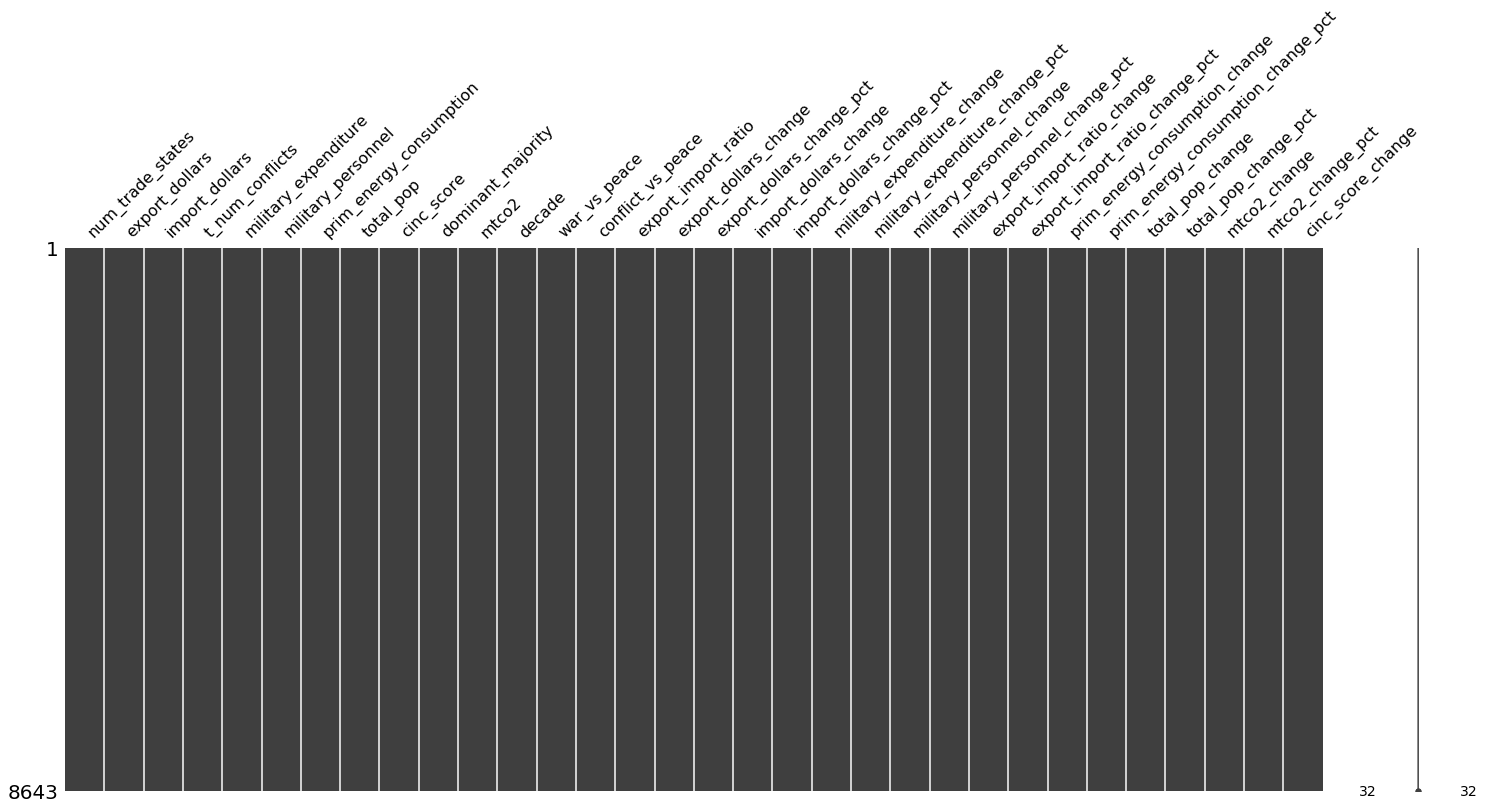

In [45]:
msno.matrix(df.drop(['cow_code', 'state_name', 'year', 'num_alliances',
                     'pre_1816_alliances', 'num_in_effect_1231_2012', 'defense_treaties',
                     'neutrality_treaties', 'nonaggression_treaties',
                     'entente_treaties', 'num_conflicts', 'avg_cum_duration',
                     'num_wars', 'ongoing_2010', 'revision_pct', 'avg_hostility_level',
                     'majority_religion', 'un_continent', 'un_region', 'election_type',
                     'legislation_type', 'legislature_status', 'party_legal_status',
                     'party_existance', 'party_existance_outside_regime', 'legislature_parties',
                     'incumbent_type', 'collective_leadership', 'num_leadership_changes',
                     'leader_tenure', 'military_leader', 'royal_leader',
                     'nominal_vs_eff_diff', 'communist_leader', 'leader_died',
                     'democratic_regime', 'cabinet_assembly', 'popular_election',
                     'regime_type', 'transition_to_democracy', 'transition_to_dictatorship',
                     'age_govt', 'num_transitions_ever'], axis = 1));

In [46]:
df.head()

,cow_code,state_name,year,num_trade_states,export_dollars,import_dollars,t_num_conflicts,military_expenditure,military_personnel,prim_energy_consumption,total_pop,cinc_score,num_alliances,pre_1816_alliances,num_in_effect_1231_2012,defense_treaties,neutrality_treaties,nonaggression_treaties,entente_treaties,num_conflicts,avg_cum_duration,num_wars,ongoing_2010,revision_pct,avg_hostility_level,majority_religion,dominant_majority,un_region,un_continent,election_type,legislation_type,legislature_status,party_legal_status,party_existance,party_existance_outside_regime,legislature_parties,incumbent_type,collective_leadership,num_leadership_changes,leader_tenure,military_leader,royal_leader,nominal_vs_eff_diff,communist_leader,leader_died,democratic_regime,cabinet_assembly,popular_election,regime_type,transition_to_democracy,transition_to_dictatorship,age_govt,num_transitions_ever,mtco2,decade,war_vs_peace,conflict_vs_peace,export_import_ratio,export_dollars_change,export_dollars_change_pct,import_dollars_change,import_dollars_change_pct,military_expenditure_change,military_expenditure_change_pct,military_personnel_change,military_personnel_change_pct,export_import_ratio_change,export_import_ratio_change_pct,prim_energy_consumption_change,prim_energy_consumption_change_pct,total_pop_change,total_pop_change_pct,mtco2_change,mtco2_change_pct,cinc_score_change
0,2,United States of America,1947,67.00,76000000.00,11343750000.00,0.15,14315999000.00,1583000.00,2631554000000.00,144126000.00,0.31,39.00,0.00,19.00,39.00,0.00,20.00,39.00,0.00,0.00,0.00,0.00,0.00,1.00,Christianity,1.00,Northern America,Americas,Direct election,Elective legislature,Elected,Multiple parties legally allowed,Multiple parties,Multiple parties outside regime,Legislature with multiple parties,Democratic incumbent,No,0,3,Yes,No,No,No,No,Yes,No,Yes,Presidential democracy,No,No,78.00,0,2480.77,40s,peace,peace,0.01,-84000000.00,0.47,0.00,1.00,-30817985000.00,0.32,-1447000.00,0.52,-0.01,0.47,255266000000.00,1.11,2737000.00,1.02,227.74,1.10,-0.05
1,95,Panama,1947,67.00,63800000.00,19140000.00,0.15,500000.00,3000.00,16000000.00,739000.00,0.00,39.00,0.00,19.00,39.00,0.00,20.00,39.00,0.00,0.00,0.00,0.00,0.00,1.00,Christianity,1.00,Central America,Americas,Direct election,Elective legislature,Elected,Multiple parties legally allowed,Multiple parties,Multiple parties outside regime,Legislature with multiple parties,Democratic incumbent,No,0,3,No,No,No,No,No,No,No,No,Civilian dictatorship,No,No,45.00,0,0.02,40s,peace,peace,3.33,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,18000.00,1.02,0.00,1.00,-0.00
2,640,Turkey,1947,67.00,327200000.00,181270000.00,0.15,171484000.00,689000.00,5802000000.00,19493000.00,0.01,4.00,0.00,0.00,0.00,0.00,4.00,3.00,0.00,0.00,0.00,0.00,0.00,1.00,Islam,1.00,Western Asia,Asia,Indirect election,Elective legislature,Elected,Multiple parties legally allowed,Multiple parties,Multiple parties outside regime,Legislature with multiple parties,Democratic incumbent,No,0,10,Yes,No,No,No,No,No,No,No,Military dictatorship,No,No,25.00,0,7.48,40s,peace,peace,1.81,0.00,1.00,0.00,1.00,-107295000.00,0.62,0.00,1.00,0.00,1.00,308000000.00,1.06,419000.00,1.02,0.46,1.07,0.00
3,345,Yugoslavia,1947,67.00,263500000.00,258950000.00,0.15,330000000.00,159000.00,10788000000.00,15539000.00,0.01,6.00,0.00,0.00,6.00,0.00,3.00,3.00,0.00,0.00,0.00,0.00,0.00,1.00,Christianity,1.00,Southern Europe,Europe,Nonelective,Elective legislature,Elected,Legally single party state,One party,One party outside regime,Only members from regime party,Democratic incumbent,No,0,8,No,No,No,Yes,No,No,No,No,Civilian dictatorship,No,No,18.00,1,6.73,40s,peace,peace,1.02,0.00,1.00,0.00,1.00,28757000.00,1.10,0.00,1.00,0.00,1.00,2884000000.00,1.36,353000.00,1.02,1.87,1.39,0.00
4,94,Costa Rica,1947,67.00,39700000.00,35990000.00,0.15,1411000.00,1000.00,38000000.00,730000.00,0.00,39.00,0.00,19.00,39.00,0.00,20.00,39.00,0.00,0.00,0.00,0.00,0.00,1.00,Christianity,1.00,Central America,Americas,Direct electi

In [47]:
df.to_pickle('../Pickles/df_imputed.pkl')

In [48]:
df = pd.read_pickle('../Pickles/df_imputed.pkl')

In [81]:
big_no_con = deepcopy(df[(df['num_conflicts'] > 0)])
big_no_con = deepcopy(big_no_con[(big_no_con['total_pop'] < big_no_con['total_pop'].mean()) & (big_no_con['prim_energy_consumption'] < big_no_con['prim_energy_consumption'].mean())])

In [98]:
df[df['num_conflicts'] > 0].groupby((df['total_pop'] < df['total_pop'].mean()) & (df['prim_energy_consumption'] < df['prim_energy_consumption'].mean())).mean()

,cow_code,year,num_trade_states,export_dollars,import_dollars,t_num_conflicts,military_expenditure,military_personnel,prim_energy_consumption,total_pop,cinc_score,num_alliances,pre_1816_alliances,num_in_effect_1231_2012,defense_treaties,neutrality_treaties,nonaggression_treaties,entente_treaties,num_conflicts,avg_cum_duration,num_wars,ongoing_2010,revision_pct,avg_hostility_level,dominant_majority,num_leadership_changes,leader_tenure,age_govt,num_transitions_ever,mtco2,export_import_ratio,export_dollars_change,export_dollars_change_pct,import_dollars_change,import_dollars_change_pct,military_expenditure_change,military_expenditure_change_pct,military_personnel_change,military_personnel_change_pct,export_import_ratio_change,export_import_ratio_change_pct,prim_energy_consumption_change,prim_energy_consumption_change_pct,total_pop_change,total_pop_change_pct,mtco2_change,mtco2_change_pct,cinc_score_change
False,515.33,1984.52,158.13,76926328461.73,74798575294.34,0.69,22583932350.53,789480.00,736563215238.10,154498644.76,0.04,15.96,0.05,12.63,12.14,0.67,11.38,13.39,2.53,0.76,0.16,0.00,0.46,3.19,0.98,0.24,6.47,47.98,0.44,621.59,1.17,6809150627.70,1.28,6520214855.77,1.22,1016045200.40,1.11,-617.14,1.01,-0.01,1.10,19391184761.90,1.11,2275741.90,1.02,15.00,1.05,-0.00
True,499.44,1979.46,147.68,4553010326.14,4538423204.97,0.75,861010209.08,102899.59,22029464006.26,9245278.76,0.00,14.23,0.01,11.87,9.72,0.20,11.41,12.39,1.96,0.84,0.15,0.01,0.44,3.26,0.98,0.21,7.72,26.57,0.41,19.21,4.13,339626409.66,1.29,397069186.35,1.43,40074475.03,1.28,1559.65,1.07,0.77,1.17,780082550.86,1.41,182597.42,1.02,0.57,1.09,0.00


In [82]:
len(big_no_con)

2097

In [83]:
big_no_con.columns

Index(['cow_code', 'state_name', 'year', 'num_trade_states', 'export_dollars',
       'import_dollars', 't_num_conflicts', 'military_expenditure',
       'military_personnel', 'prim_energy_consumption', 'total_pop',
       'cinc_score', 'num_alliances', 'pre_1816_alliances',
       'num_in_effect_1231_2012', 'defense_treaties', 'neutrality_treaties',
       'nonaggression_treaties', 'entente_treaties', 'num_conflicts',
       'avg_cum_duration', 'num_wars', 'ongoing_2010', 'revision_pct',
       'avg_hostility_level', 'majority_religion', 'dominant_majority',
       'un_region', 'un_continent', 'election_type', 'legislation_type',
       'legislature_status', 'party_legal_status', 'party_existance',
       'party_existance_outside_regime', 'legislature_parties',
       'incumbent_type', 'collective_leadership', 'num_leadership_changes',
       'leader_tenure', 'military_leader', 'royal_leader',
       'nominal_vs_eff_diff', 'communist_leader', 'leader_died',
       'democratic_regime',

In [93]:
c = big_no_con.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")

so_df = pd.DataFrame(so)

In [94]:
so_df[(abs(so_df[0]) > 0.5) & (so_df[0] != 1)]

,,0
military_expenditure,export_dollars,0.51
export_dollars,military_expenditure,0.51
import_dollars_change,export_dollars,0.54
export_dollars,import_dollars_change,0.54
total_pop_change,total_pop_change_pct,0.55
total_pop_change_pct,total_pop_change,0.55
cow_code,defense_treaties,0.56
defense_treaties,cow_code,0.56
total_pop,military_personnel,0.57
military_personnel,total_pop,0.57


In [84]:
value_counts_list = ['dominant_majority', 'un_region', 'un_continent',
                     'election_type', 'legislation_type',
                     'legislature_status', 'party_legal_status', 'party_existance'
                     'party_existance_outside_regime', 'legislature_parties',
                     'incumbent_type', 'collective_leadership',
                     'military_leader', 'royal_leader',
                     'nominal_vs_eff_diff', 'communist_leader', 'leader_died',
                     'democratic_regime', 'cabinet_assembly', 'popular_election',
                     'regime_type', 'transition_to_democracy', 'transition_to_dictatorship']

for column in value_counts_list:
    print('')
    print(big_no_con[column].value_counts())


1.00    2062
0.00      35
Name: dominant_majority, dtype: int64

Western Asia                 448
South-Eastern Asia           230
Eastern Africa               206
South America                150
Southern Europe              136
Northern Africa              135
Middle Africa                101
Eastern Asia                  97
Western Africa                96
Central America               93
Southern Asia                 76
Western Europe                59
Northern Europe               59
Caribbean                     51
Eastern Europe                51
Southern Africa               36
Australia and New Zealand     29
Central Asia                  26
Melanesia                     12
Northern America               5
Micronesia                     1
Name: un_region, dtype: int64

Asia        877
Africa      574
Europe      305
Americas    299
Oceania      42
Name: un_continent, dtype: int64

Nonelective          776
Indirect election    695
Direct election      626
Name: election_type, 

In [92]:
big_no_con.drop(['cow_code', 'year'], axis = 1).corr()

,num_trade_states,export_dollars,import_dollars,t_num_conflicts,military_expenditure,military_personnel,prim_energy_consumption,total_pop,cinc_score,num_alliances,pre_1816_alliances,num_in_effect_1231_2012,defense_treaties,neutrality_treaties,nonaggression_treaties,entente_treaties,num_conflicts,avg_cum_duration,num_wars,ongoing_2010,revision_pct,avg_hostility_level,dominant_majority,num_leadership_changes,leader_tenure,age_govt,num_transitions_ever,mtco2,export_import_ratio,export_dollars_change,export_dollars_change_pct,import_dollars_change,import_dollars_change_pct,military_expenditure_change,military_expenditure_change_pct,military_personnel_change,military_personnel_change_pct,export_import_ratio_change,export_import_ratio_change_pct,prim_energy_consumption_change,prim_energy_consumption_change_pct,total_pop_change,total_pop_change_pct,mtco2_change,mtco2_change_pct,cinc_score_change
num_trade_states,1.00,0.28,0.26,-0.49,0.24,-0.01,0.20,0.10,-0.15,0.17,-0.02,0.28,0.17,0.06,0.11,0.08,-0.03,-0.01,-0.21,0.10,-0.04,-0.20,0.04,-0.05,0.06,0.09,0.11,0.06,-0.04,0.14,-0.05,0.16,-0.03,0.00,-0.03,-0.02,-0.09,-0.01,-0.04,-0.01,-0.02,0.02,-0.05,-0.03,-0.11,0.03
export_dollars,0.28,1.00,0.94,-0.12,0.51,0.10,0.45,0.16,0.22,0.01,0.03,0.06,0.06,0.04,-0.00,0.03,-0.04,-0.01,-0.05,-0.02,0.06,-0.09,-0.04,0.04,-0.11,0.17,0.03,0.40,-0.02,0.50,-0.01,0.54,-0.01,0.04,-0.01,-0.02,-0.07,-0.01,-0.02,0.11,-0.01,0.00,-0.09,0.14,-0.02,0.00
import_dollars,0.26,0.94,1.00,-0.12,0.49,0.06,0.44,0.13,0.19,0.01,0.01,0.05,0.04,-0.00,0.02,0.04,-0.04,-0.03,-0.05,-0.01,0.05,-0.09,-0.03,0.03,-0.09,0.20,-0.01,0.38,-0.02,0.45,-0.01,0.64,-0.01,0.05,-0.01,-0.01,-0.06,-0.01,-0.02,0.13,-0.01,0.00,-0.06,0.16,-0.02,0.01
t_num_conflicts,-0.49,-0.12,-0.12,1.00,-0.15,-0.04,-0.10,-0.10,0.08,-0.10,0.01,-0.12,-0.05,0.00,-0.09,-0.07,0.08,0.02,0.20,-0.10,0.01,0.09,-0.02,0.02,-0.09,-0.02,-0.08,-0.02,0.03,-0.10,0.00,-0.09,-0.00,-0.03,0.01,0.01,0.05,0.03,0.01,-0.02,-0.01,-0.01,0.00,-0.01,0.09,-0.05
military_expenditure,0.24,0.51,0.49,-0.15,1.00,0.36,0.49,0.25,0.43,0.08,-0.01,0.10,0.03,0.05,0.10,0.11,0.13,0.04,0.06,-0.02,0.08,0.02,-0.01,0.00,0.00,0.23,0.01,0.41,-0.03,0.21,-0.01,0.22,-0.01,0.26,-0.00,0.02,-0.05,-0.01,-0.01,0.18,-0.02,0.03,-0.08,0.16,-0.02,0.15
military_personnel,-0.01,0.10,0.06,-0.04,0.36,1.00,0.37,0.57,0.77,-0.07,-0.00,-0.08,-0.11,0.02,-0.08,-0.04,0.16,0.08,0.07,-0.04,0.12,0.07,-0.04,0.02,0.14,0.13,0.01,0.34,-0.02,0.06,-0.01,0.04,-0.02,0.02,-0.02,0.13,-0.02,-0.01,-0.02,0.12,-0.02,0.06,-0.04,0.18,-0.01,0.10
prim_energy_consumption,0.20,0.45,0.44,-0.10,0.49,0.37,1.00,0.46,0.63,0.12,-0.02,0.16,0.16,0.10,0.10,0.13,0.02,-0.03,-0.02,-0.03,0.10,-0.04,0.05,0.03,0.05,0.22,0.15,0.74,-0.04,0.22,-0.02,0.25,-0.02,0.02,-0.02,0.02,-0.07,-0.01,-0.03,0.28,-0.02,0.05,-0.06,0.24,-0.04,0.06
total_pop,0.10,0.16,0.13,-0.10,0.25,0.57,0.46,1.00,0.65,-0.09,-0.03,-0.10,-0.09,0.03,-0.11,-0.07,0.05,-0.02,0.03,-0.05,0.02,0.07,0.01,0.02,0.02,0.21,0.21,0.34,-0.03,0.09,-0.02,0.09,-0.02,0.03,-0.02,0.06,-0.03,-0.01,-0.03,0.17,-0.03,0.12,-0.03,0.21,-0.01,0.07
cinc_score,-0.15,0.22,0.19,0.08,0.43,0.77,0.63,0.65,1.00,-0.02,-0.02,-0.05,-0.01,0.06,-0.05,0.02,0.10,0.02,0.10,-0.05,0.08,0.08,-0.02,0.11,0.02,0.21,0.07,0.60,-0.03,0.11,-0.02,0.10,-0.02,0.06,-0.02,0.07,-0.04,-0.01,-0.02,0.22,-0.02,0.06,-0.07,0.29,-0.01,0.08
num_alliances,0.17,0.01,0.01,-0.10,0.08,-0.07,0.12,-0.09,-0.02,1.00,0.04,0.92,0.87,0.03,0.90,0.95,-0.04,-0.13,-0.08,0.03,0.10,-0.06,0.09,0.01,-0.02,0.05,0.23,0.02,-0.04,0.01,-0.01,0.01,-0.03,0.00,-0.02,-0.01,-0.04,-0.02,-0.02,0.04,-0.02,-0.01,0.06,0.02,-0.04,0.00
